In [66]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
test_1_resolution = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 5/5_task_1.csv")

test_2_button = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 6/Lesson 5/5_task_2.csv")

In [68]:
test_1_resolution.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [69]:
test_2_button.head()

id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0

In [70]:
test_1_resolution.query("group == 'A'").events

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [71]:
# step 3

In [72]:
ss.levene(test_1_resolution.query("group == 'A'").events, \
          test_1_resolution.query("group == 'B'").events, \
          test_1_resolution.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [73]:
# step 4

In [74]:
ss.normaltest(test_1_resolution.query("group == 'A'").events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [75]:
ss.normaltest(test_1_resolution.query("group == 'B'").events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [76]:
ss.normaltest(test_1_resolution.query("group == 'C'").events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [77]:
# step 5


In [78]:
ss.f_oneway(test_1_resolution.query("group == 'A'").events, test_1_resolution.query("group == 'B'").events, test_1_resolution.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [79]:
# step 6

In [80]:
pairwise_tukeyhsd(test_1_resolution.events,test_1_resolution.group).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [81]:
# step 9

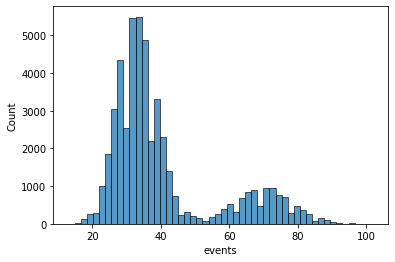

In [82]:
sns.histplot(test_2_button.query("group == 'test'").events,bins=50)

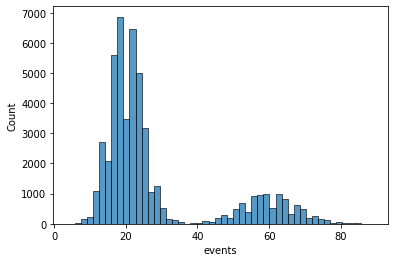

In [83]:
sns.histplot(test_2_button.query("group == 'control'").events,bins=50)

In [84]:
# step 10

In [85]:
test_2_button.groupby(['group','segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [86]:
round(7.805347,2)

7.81

In [87]:
# step 12

In [88]:
model = smf.ols(formula = "events ~ segment + group + segment:group", data = test_2_button).fit()

In [89]:
test = anova_lm(model, typ=2)

In [90]:
test

sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN

In [91]:
test_2_button_step12 = test_2_button.copy()
test_2_button_step12['combination'] = test_2_button_step12['group'] + ' / ' + test_2_button_step12['segment']

In [92]:
test_2_button_step12

id    group segment  events    combination
0      83440     test    high    78.0    test / high
1      96723     test    high    71.0    test / high
2      68719     test    high    80.0    test / high
3      50399     test    high    80.0    test / high
4      95613     test    high    78.0    test / high
...      ...      ...     ...     ...            ...
99995  60695  control     low    15.0  control / low
99996   5934  control     low    16.0  control / low
99997  30046  control     low    22.0  control / low
99998  26474  control     low    21.0  control / low
99999  42649  control     low    23.0  control / low

[100000 rows x 5 columns]

In [93]:
pairwise_tukeyhsd(test_2_button_step12.events,test_2_button_step12.combination).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [94]:
pairwise_tukeyhsd(test_2_button_step12.events,test_2_button_step12.segment).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [95]:
# step 13

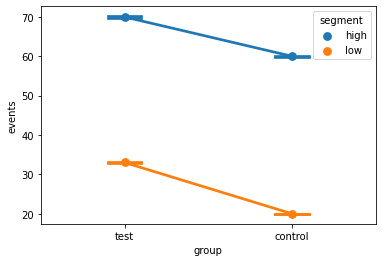

In [98]:
sns.pointplot(x = 'group', y = 'events', data = test_2_button_step12, hue = 'segment', capsize = .2)

In [99]:
test_2_button_step12

id    group segment  events    combination
0      83440     test    high    78.0    test / high
1      96723     test    high    71.0    test / high
2      68719     test    high    80.0    test / high
3      50399     test    high    80.0    test / high
4      95613     test    high    78.0    test / high
...      ...      ...     ...     ...            ...
99995  60695  control     low    15.0  control / low
99996   5934  control     low    16.0  control / low
99997  30046  control     low    22.0  control / low
99998  26474  control     low    21.0  control / low
99999  42649  control     low    23.0  control / low

[100000 rows x 5 columns]

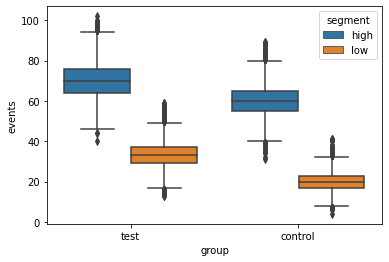

In [101]:
sns.boxplot(x = 'group', y = 'events', data = test_2_button_step12, hue = 'segment')